In this notebook, we show the class imbalance in each of the years and also summarize the distribution of values for some of the features in the 2015 cleaned dataset. 

In [1]:
##defining the path to the pre-processed datasets.

from google.colab import drive
drive.mount('/content/gdrive')
data_path = '/content/gdrive/Shareddrives/CIS520 Final Project/dataset/pre_processed/'

Mounted at /content/gdrive


In [8]:
##Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from collections import Counter
import seaborn as sns
plt.rcParams.update({'font.size': 14})

In [3]:
##Reading the 2015 cleaned dataset
df_2015 = pd.read_csv(data_path + '2015_selected.csv')
##Removing the index column
df_2015 = df_2015.drop(["Unnamed: 0"], axis = 1)

##Reading the 2014 cleaned dataset
df_2014 = pd.read_csv(data_path + '2014_selected.csv')
##Removing the index column
df_2014 = df_2014.drop(["Unnamed: 0"], axis = 1)

##Reading the 2013 cleaned dataset
df_2013 = pd.read_csv(data_path + '2013_selected.csv')
##Removing the index column
df_2013 = df_2013.drop(["Unnamed: 0"], axis = 1)

##Reading the 2012 cleaned dataset
df_2012 = pd.read_csv(data_path + '2012_selected.csv')
##Removing the index column
df_2012 = df_2012.drop(["Unnamed: 0"], axis = 1)

##Reading the 2011 cleaned dataset
df_2011 = pd.read_csv(data_path + '2011_selected.csv')
##Removing the index column
df_2011 = df_2011.drop(["Unnamed: 0"], axis = 1)

## Class imbalance in the cleaned datasets



First we show the class imbalance in the cleaned datasets of the five years. We observe that the class imbalance is similar across years and for each of the years is also highly class imbalanced with roughly 1 out of 6 respondents being in the diabetic class. 

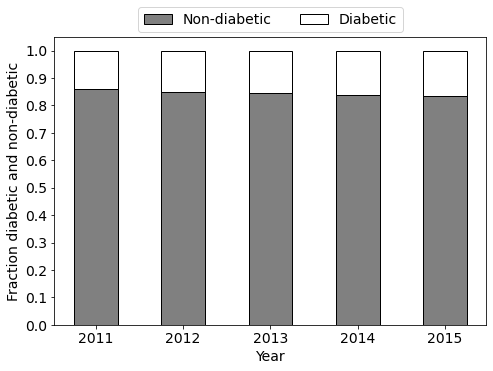

In [4]:
##Creating an array to store number of diabetic and non-diabetic samples 
count = np.array([[len(df_2011), len(df_2012), len(df_2013), len(df_2014), len(df_2015)],
                  [len(df_2011[df_2011['DIABETE3'] == 0]), len(df_2012[df_2012['DIABETE3'] == 0]), len(df_2013[df_2013['DIABETE3'] == 0]), len(df_2014[df_2014['DIABETE3'] == 0]), len(df_2015[df_2015['DIABETE3'] == 0])],
                  [len(df_2011[df_2011['DIABETE3'] == 1]), len(df_2012[df_2012['DIABETE3'] == 1]), len(df_2013[df_2013['DIABETE3'] == 1]), len(df_2014[df_2014['DIABETE3'] == 1]), len(df_2015[df_2015['DIABETE3'] == 1])]])
ind = [i/5 for i in range(1,6)]

##Plotting bar graph for show fraction of samples that are diabetic and non-diabetic for eah of the year
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(ind, (np.divide(count[1,:],count[0,:])), 0.1, edgecolor='k', color='grey', label = 'Non-diabetic')
ax.bar(ind, np.divide(count[2,:],count[0,:]), 0.1, fill=False, bottom=np.divide(count[1,:],count[0,:]), color='k', label = 'Diabetic')
ax.set_ylabel('Fraction diabetic and non-diabetic')
ax.set_xlabel('Year')
ax.set_xticks(ind)
ax.set_xticklabels(['2011', '2012', '2013', '2014', '2015'])
ax.set_yticks(np.arange(0, 1.01, 0.1))
ax.legend(bbox_to_anchor=(0,1.01,1,0.1), loc="center", borderaxespad=0, ncol=2)
#plt.savefig('class_imbalance.png',bbox_inches = 'tight')
#files.download("class_imbalance.png")
plt.show()

## Visualizations for different types of features

The 22 selected features fall under following four categories:
Ordinal (clear ordering of the categories, eg: Income) , Nominal (no intrinsic order of categories, eg: Marital), Binary (a type of nominal with two categories but no order among them) and Real/Distinct valued (BMI, features with number of days as values)

For ordinal features, we use GENHLTH as the example. \\
GENHLTH: Would you say that in general your health is? \\
1: Excellent, 2: Very Good, 3: Good, 4: Fair, 5: Poor

We show the distribution of respondents into different general health categories.

Counter({2.0: 58581, 3.0: 51899, 1.0: 28095, 4.0: 21996, 5.0: 8815})


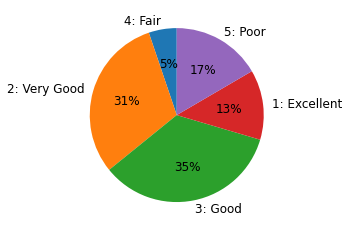

In [5]:
##Using counter function in collections library to count samples in different categories
genhlth = Counter(df_2015['GENHLTH'])
##Output from counter
print(genhlth)
##Plotting pie chart to show percentage of samples in different categories
plt.figure()
plt.pie(genhlth.values(), labels = ['4: Fair', '2: Very Good', '3: Good', '1: Excellent', '5: Poor'], startangle=90, autopct='%1.0f%%', 
        textprops={'fontsize': 12})
#plt.savefig('genhlth.png',bbox_inches = 'tight')
#files.download("genhlth.png")
plt.show()

_BMI5 is one of the real-valued features (others being the 0-30 days features). To summarize _BMI5, we divide the values in different categories based on CDC guidelines for weight status. We find roughly equal percentage of respondents in 'Healthy weight', 'Overweight' and 'Obese' categories.

In [6]:
##Finding fraction of respondents in different weight status (based on CDC guidelines) categories.
bmi = []
##for weight status = 'Underweight'
bmi.append(((df_2015['_BMI5'].values < 18.5).sum()/len(df_2015))*100)
##for weight status = 'Normal weight'
bmi.append((((df_2015['_BMI5'].values > 18.5) & (df_2015['_BMI5'].values < 25)).sum()/len(df_2015))*100)
##for weight status = 'Overweight'
bmi.append((((df_2015['_BMI5'].values > 25) & (df_2015['_BMI5'].values < 30)).sum()/len(df_2015))*100)
##for weight status = 'Obese'
bmi.append((((df_2015['_BMI5'].values > 30)).sum()/len(df_2015))*100)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

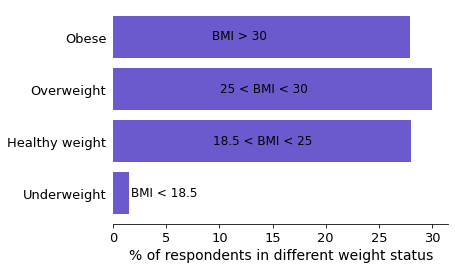

In [7]:
##Plotting horizontal bar graph to show percentage of respondents in different weight status
def autolabel(bar_plot):
    for idx,rect in enumerate(bar_plot):
        if idx == 0:
          ax.text(rect.get_width()+0.2, idx-0.05, bmi_cat[idx], color = 'black', fontsize = 12)
        else:
          ax.text(rect.get_width()/3, idx-0.05, bmi_cat[idx], color = 'black', fontsize = 12)

bmi_cat = ['BMI < 18.5', '18.5 < BMI < 25', '25 < BMI < 30', 'BMI > 30']
fig, ax = plt.subplots()
bar_bmi = ax.barh(['Underweight', 'Healthy weight', 'Overweight', 'Obese'], bmi, color='slateblue')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.tick_params(left=False)
plt.xlabel('% of respondents in different weight status')
sns.despine(left=True)
autolabel(bar_bmi)
#plt.savefig('bmi.png',bbox_inches = 'tight')
#files.download("bmi.png")
plt.show()

To show some binary features, we use ADDEPEV2, CHCKIDNY1, CVDCRHD4, CVDSTRK3 as examples. All of them correspond to questions related to some disease. \\
ADDEPEV2: (Ever told) you that you have a depressive disorder, including depression, major depression, dysthymia, or minor depression? \\
CHCKIDNY1: (Ever told) you have kidney disease? Do NOT include kidney stones, bladder infection or incontinence. \\
CVDCRHD4: (Ever told) you had angina or coronary heart disease? \\
CVDSTRK3 : (Ever told) you had a stroke. \\
We summarize the distribution of 'yes' and 'no' using horizontal bar charts.

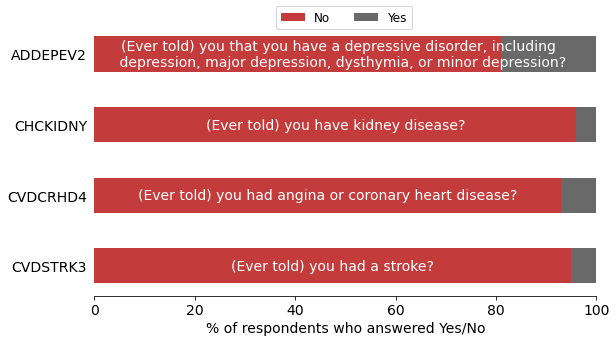

In [10]:
##Counting yes and no each of the four features
category_names = ['No', 'Yes']
results = {'ADDEPEV2': [round(Counter(df_2015['ADDEPEV2'])[0.0]*100/len(df_2015)),round(Counter(df_2015['ADDEPEV2'])[1.0]*100/len(df_2015))],
           'CHCKIDNY': [round(Counter(df_2015['CHCKIDNY'])[0.0]*100/len(df_2015)),round(Counter(df_2015['CHCKIDNY'])[1.0]*100/len(df_2015))], 
           'CVDCRHD4': [round(Counter(df_2015['CVDCRHD4'])[0.0]*100/len(df_2015)),round(Counter(df_2015['CVDCRHD4'])[1.0]*100/len(df_2015))],
           'CVDSTRK3': [round(Counter(df_2015['CVDSTRK3'])[0.0]*100/len(df_2015)),round(Counter(df_2015['CVDSTRK3'])[1.0]*100/len(df_2015))]}
feature_disp = ['(Ever told) you that you have a depressive disorder, including \n depression, major depression, dysthymia, or minor depression?',
                '(Ever told) you have kidney disease?', '(Ever told) you had angina or coronary heart disease?',
                '(Ever told) you had a stroke?']


## Code taken from https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/horizontal_barchart_distribution.html#sphx-glr-gallery-lines-bars-and-markers-horizontal-barchart-distribution-py
def survey(results, category_names):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*.
    category_names : list of str
        The category labels.
    """
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap('RdGy')(np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(9, 5))
    ax.invert_yaxis()
    ax.set_xlabel('% of respondents who answered Yes/No')
    ax.xaxis.set_visible(True)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        bar_binary = ax.barh(labels, widths, left=starts, height=0.5,
                             label=colname, color=color)
        xcenters = starts 

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'

        if colname == 'No':
          for y, (x, c) in enumerate(zip(xcenters, widths)):
              if y == 0:
                ax.text(x+ c/1.65, y, feature_disp[y], ha='center', va='center', color='white')
              else: 
                ax.text(x+ c/2, y, feature_disp[y], ha='center', va='center', color='white')
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0.35, 0.96),
              loc='lower left', fontsize=12)

    return fig, ax

##Plotting the horizontal bar graphs
survey(results, category_names)
plt.tick_params(left=False)
sns.despine(left=True)
#plt.savefig('binary.png',bbox_inches = 'tight')
#files.download("binary.png")
plt.show()